In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("../artifacts/raw/data.csv")

In [25]:
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [26]:
df.size
df.shape

(167497, 28)

In [27]:
df.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

## Data Vizualtization

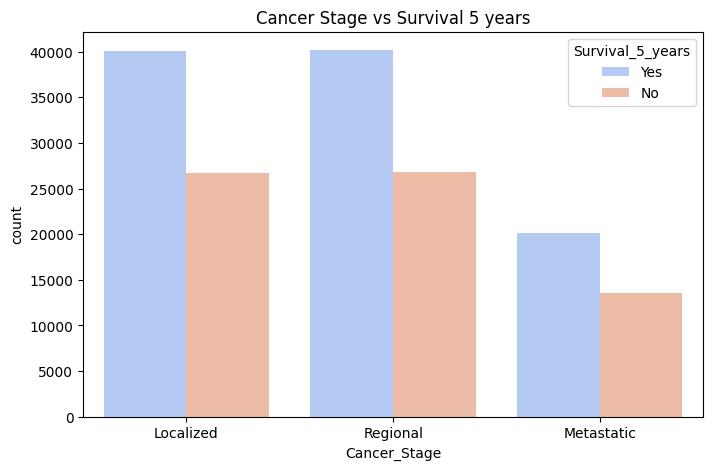

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x="Cancer_Stage",hue="Survival_5_years",data=df,palette="coolwarm")
plt.title("Cancer Stage vs Survival 5 years")
plt.show()

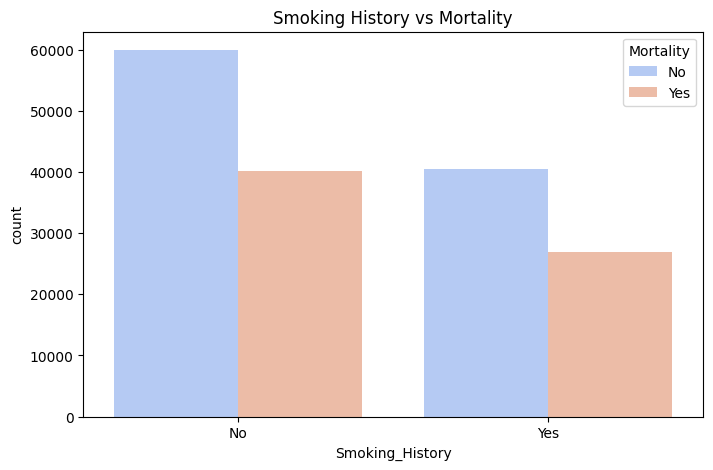

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x="Smoking_History",hue="Mortality",data=df,palette="coolwarm")
plt.title("Smoking History vs Mortality")
plt.show()

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_13780\7329411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancer_Stage",y="Tumor_Size_mm",data=df,palette="coolwarm")


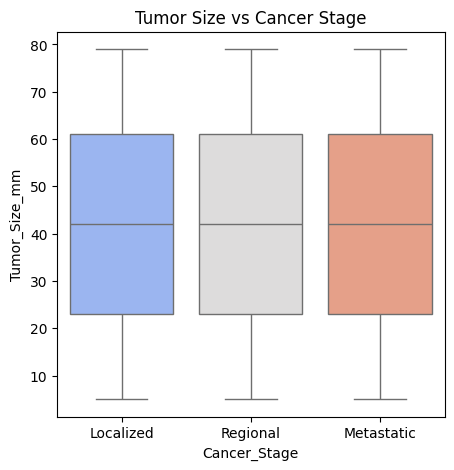

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(x="Cancer_Stage",y="Tumor_Size_mm",data=df,palette="coolwarm")
plt.title("Tumor Size vs Cancer Stage")
plt.show()

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_13780\4111356199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survival_Prediction",y="Healthcare_Costs",data=df,palette="coolwarm")


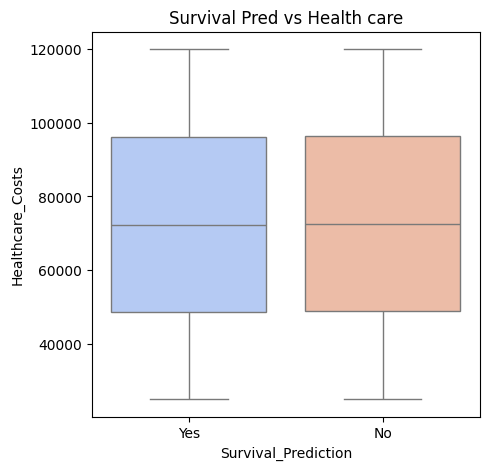

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(x="Survival_Prediction",y="Healthcare_Costs",data=df,palette="coolwarm")
plt.title("Survival Pred vs Health care")
plt.show()

## Data Processing

In [46]:
df = df.drop(columns=['Patient_ID'])

In [47]:
X = df.drop(columns=['Survival_Prediction'])
Y = df["Survival_Prediction"]

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train , X_test , y_train , y_test = train_test_split(X,Y , test_size=0.2 , random_state=42)

In [52]:
from sklearn.feature_selection import chi2,SelectKBest

In [53]:
X_cat = X_train.select_dtypes(include=['int64' , 'float64'])
chi2_selector = SelectKBest(score_func=chi2 , k="all")
chi2_selector.fit(X_cat,y_train)


,score_func,<function chi...001ECBF7DED40>
,k,'all'


In [54]:
chi2_scores = pd.DataFrame({
    'Feature' : X_cat.columns,
    "Chi2 Score" : chi2_selector.scores_
}).sort_values(by='Chi2 Score' , ascending=False)

In [55]:
chi2_scores

,Feature,Chi2 Score
19,Healthcare_Costs,2097.430133
4,Tumor_Size_mm,7.971461
16,Treatment_Type,4.987144
11,Diabetes,2.103967
21,Mortality_Rate_per_100K,1.963077
25,Insurance_Status,1.464241
3,Cancer_Stage,1.281849
14,Screening_History,1.159519
0,Country,0.883425
24,Healthcare_Access,0.713346


In [57]:
top_features=chi2_scores.head(5)["Feature"].tolist()

In [58]:
X = X[top_features]

In [59]:
X


,Healthcare_Costs,Tumor_Size_mm,Treatment_Type,Diabetes,Mortality_Rate_per_100K
0,54413,69,1,0,5
1,76553,33,0,0,25
2,62805,17,0,0,27
3,89393,14,3,0,11
4,66425,34,3,0,27
...,...,...,...,...,...
167492,100924,49,1,0,13
167493,90331,29,0,0,22
167494,90631,62,0,1,19
167495,114385,35,3,1,23


In [60]:
X_train , X_test , y_train , y_test = train_test_split(X,Y , test_size=0.2 , random_state=42 , stratify=Y)

### MODEL BUILDING

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gb = GradientBoostingClassifier(n_estimators=100 , learning_rate=0.1 , max_depth=3 , random_state=42)

In [65]:
gb.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [66]:
y_pred = gb.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score , roc_auc_score, classification_report

In [68]:
accuracy = accuracy_score(y_test , y_pred)

In [69]:
accuracy

0.5995223880597015

In [70]:
report = classification_report(y_test,y_pred)

In [71]:
print(report)

              precision    recall  f1-score   support

          No       0.44      0.00      0.00     13412
         Yes       0.60      1.00      0.75     20088

    accuracy                           0.60     33500
   macro avg       0.52      0.50      0.38     33500
weighted avg       0.54      0.60      0.45     33500



In [72]:
y_proba = gb.predict_proba(X_test)[ : , 1] if len(Y.unique())== 2 else None

In [73]:
roc_auc_score(y_test , y_proba)

0.49967731082550826

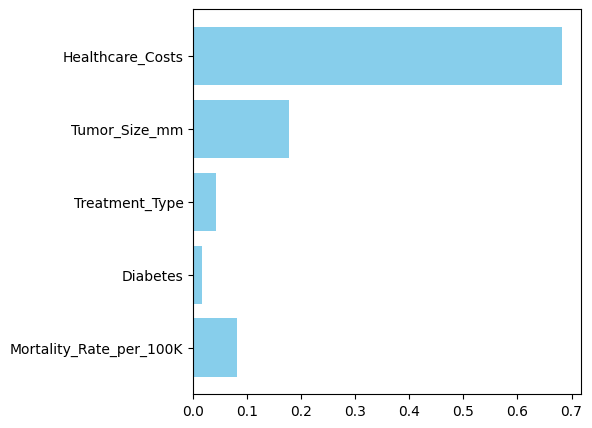

In [74]:
plt.figure(figsize=(5,5))
plt.barh(top_features , gb.feature_importances_ , color="skyblue")
plt.gca().invert_yaxis()
plt.show()

## TESTING

In [75]:
X.columns

Index(['Healthcare_Costs', 'Tumor_Size_mm', 'Treatment_Type', 'Diabetes',
       'Mortality_Rate_per_100K'],
      dtype='object')

In [76]:
test_array = np.array([0,0,0,0,0]).reshape(1,-1)

In [77]:
gb.predict(test_array)

array(['Yes'], dtype=object)

In [78]:
#### Scaler...
###  Model ...